
0: 384x640 11 cars, 1 truck, 131.9ms
Speed: 3.3ms preprocess, 131.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


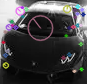

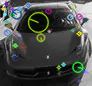

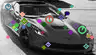

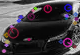

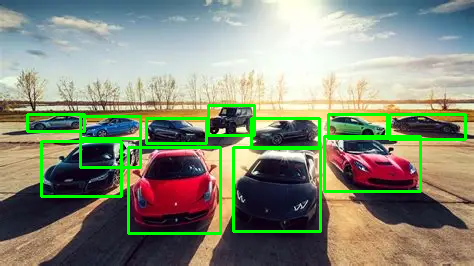

In [14]:

!pip install opencv-python opencv-contrib-python ultralytics

import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

model = YOLO("yolov8n.pt")

image_path = "cars.jpg"
image = cv2.imread(image_path)

if image is None:
    print("Image not found!")
    exit()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
results = model(image)

sift = cv2.SIFT_create()

for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()

    for box in boxes:
        x1, y1, x2, y2 = map(int, box)

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        roi = gray[y1:y2, x1:x2]

        if roi.size == 0:
            continue

        keypoints, descriptors = sift.detectAndCompute(roi, None)

        sift_img = cv2.drawKeypoints(
            roi,
            keypoints,
            None,
            flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
        )

        cv2_imshow(sift_img)

cv2_imshow(image)
